# Metode CRYPS DM

# 1. Bussiness Understanding

## 
Tahap Bussiness Understanding bertujuan untuk mengetahui tingkat kelangsungan hidup pasien dengan gagal jantung dari kreatinin serum dan platelets

Para pengidap gagal jantung biasanya tidak memiliki waktu yang lama, oleh karena itu penelitian kali ini ditujukan untuk mengetahui berapa lam seorang pengidap gagal jantung dapat bertahan hidup

Dataset diambil dari Kaggle (https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data)

# 2. Data Understanding

#
Tahap ini menjelaskan tiap varible yang ada pada data

## 
- Age = Umur
- anaemia = Penurunan sel darah merah atau hemoglobin (boolean)
- creatinine_phosphokinase = Tingkat enzim CPK dalam darah (mcg/L)
- diabetes = Jika pasien menderita diabetes (boolean)
- ejection_fraction = Persentase darah yang meninggalkan jantung pada setiap kontraksi (persentase)
- high_blood_pressure = Jika pasien memiliki hipertensi (boolean)
- platelets = Trombosit dalam darah (kiloplatelet/mL)
- serum_creatinine = Tingkat serum kreatinin dalam darah (mg/dL)
- serum_sodium = Tingkat natrium serum dalam darah (mEq/L)
- sex = Wanita atau pria 
- smoking = Jika pasien seorang perokok
- time = waktu yang dimiliki pasien

# Import Library

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

# Membaca Dataset

In [100]:
df = pd.read_csv('heart_failure_dataset.csv')

In [101]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


# 3. Data Preparation

In [102]:
df.rename(index=str, columns={
    'creatinine_phosphokinase': 'creatinine'
}, inplace=True)

In [103]:
#Drop kolom yang tidak dibutuhkan
X = df.drop(['anaemia', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time', 'DEATH_EVENT'], axis=1)

In [104]:
#Meninjau Nilai Yang hilang
df.isnull().any()
df.columns[df.isnull().any()]

Index([], dtype='object')

In [105]:
print(X)

      age  creatinine  platelets
0    75.0         582  265000.00
1    55.0        7861  263358.03
2    65.0         146  162000.00
3    50.0         111  210000.00
4    65.0         160  327000.00
..    ...         ...        ...
294  62.0          61  155000.00
295  55.0        1820  270000.00
296  45.0        2060  742000.00
297  45.0        2413  140000.00
298  50.0         196  395000.00

[299 rows x 3 columns]


# Visualisasi Data

# Menentukan jumlah elbow


In [106]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

c:\Users\fauzi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\fauzi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\fauzi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\fauzi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

Text(5, 150000, 'Possible elbow point')

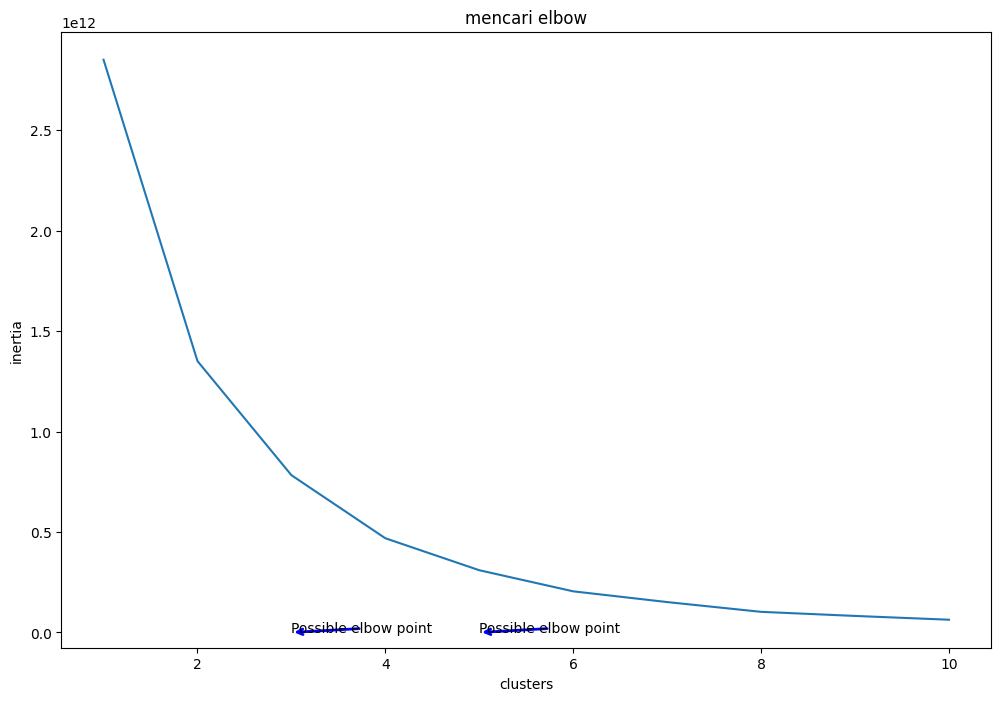

In [108]:
clusters=[]
for i in range(1,11):
    km =KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)

fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(x=list(range(1,11)), y=clusters, ax=ax)
ax.set_title('mencari elbow')
ax.set_xlabel('clusters')
ax.set_ylabel('inertia')

# Find the elbow point
elbow_point = None
for i in range(1, len(clusters) - 1):
    slope = clusters[i] - clusters[i + 1]
    if elbow_point is None or slope < elbow_point[1]:
        elbow_point = (i + 1, slope)

#panah elbow
ax.annotate('Possible elbow point', xy=(3,140000),xytext=(3,50000),xycoords='data',
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3',color='blue',lw=2))

ax.annotate('Possible elbow point', xy=(5,80000),xytext=(5,150000),xycoords='data',
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3',color='blue',lw=2))


In [111]:
n_clust = 4
kmean = KMeans(n_clusters=n_clust).fit(X)
X['Labels'] = kmean.labels_

c:\Users\fauzi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# 5. Evaluasi data

### Clustering dengan Kmeans

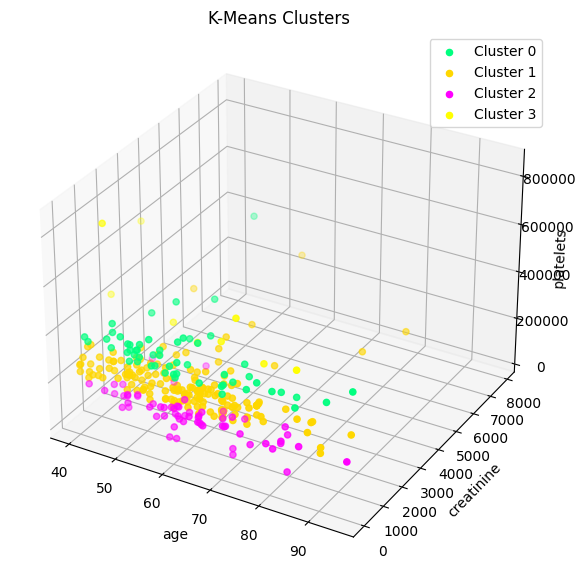

In [112]:
plt.figure(figsize=(10,7))
ax = plt.axes(projection='3d')
cluster_palette = ['springgreen', 'gold', 'magenta', 'yellow', 'red']

for label in range(n_clust):
    ax.scatter3D(X[X['Labels'] == label]['age'], X[X['Labels'] == label]['creatinine'], X[X['Labels'] == label]['platelets'], color=cluster_palette[label], label=f'Cluster {label}')

ax.set_xlabel('age')
ax.set_ylabel('creatinine')
ax.set_zlabel('platelets', rotation=90)
ax.zaxis.labelpad=-3
ax.set_title('K-Means Clusters')

ax.legend()
plt.savefig("scatter_hue", bbox_inches='tight')

In [113]:
print(X)

      age  creatinine  platelets  Labels
0    75.0         582  265000.00       1
1    55.0        7861  263358.03       1
2    65.0         146  162000.00       2
3    50.0         111  210000.00       1
4    65.0         160  327000.00       0
..    ...         ...        ...     ...
294  62.0          61  155000.00       2
295  55.0        1820  270000.00       1
296  45.0        2060  742000.00       3
297  45.0        2413  140000.00       2
298  50.0         196  395000.00       0

[299 rows x 4 columns]


Dari hasil diatas didapt 3 label yaitu 0,1,2, dan 3. Bisa kita kita asumsikan dengan

- label 0 : orang dengan penyakit gagal jantung  pada usia 45 - 65 disebabkan platelet rendah dan creatine yang juga rendah. Kisaran 140.000 - 162.000
- label 1 : Orang dengan penyakit gagal jantung pada usia 50 - 65 disebabkan platelet dan creatine yang cukup tinggi, kisaran 327.000 - 395.000 
- label 2 : Orang dengan penyakit gagal jantung pada usia 50 - 75 disebabkan platelet dan creatine yang tinggi, kisaran 210.000 - 270.000 
- label 3 : Orang dengan penyakit gagal jantung pada usia 45 yang disebabkan platelet dan creatine sangat tinggi, kisaran 742.000

In [114]:
cluster_size = X.groupby(['Labels'], as_index=False).size()
cluster_size['Percentage'] = cluster_size['size'] / sum(cluster_size['size'])
cluster_size

,Labels,size,Percentage
0,0,56,0.187291
1,1,170,0.568562
2,2,64,0.214047
3,3,9,0.030100


In [115]:
X.to_excel('output_cluster.xlsx')

# Save Model

In [117]:
import pickle

In [119]:
pickle.dump(kmean, open('output_heart_failure_dataset.sav','wb'))

In [120]:
import matplotlib
import seaborn
import pandas
import seaborn as sns
import sklearn
import openpyxl
import streamlit

print("Versi Seaborn:", sns.__version__)
print("Versi scikit-learn:", sklearn.__version__)
print("Versi openpyxl:", openpyxl.__version__)


print("Matplotlib version:", matplotlib.__version__)
print("Seaborn version:", seaborn.__version__)
print("Pandas version:", pandas.__version__)

Versi Seaborn: 0.12.2
Versi scikit-learn: 1.2.2
Versi openpyxl: 3.1.2
Matplotlib version: 3.7.1
Seaborn version: 0.12.2
Pandas version: 1.5.3
